# Demo RNA Multi-Perceptrón Backpropagation para estimar un valor

1) Cargar librerías:

In [ ]:
#@title Librerías a usar
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import math

print("Librerías cargadas")

Librerías cargadas


2) Cargar los datos:

In [ ]:
# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = '/content/gdrive/My Drive/IA/demoIA/datos/'  #@param {type:"string"}


Mounted at /content/gdrive


In [ ]:
## selección de los parámetros

#@markdown ### Archivo de datos a utilizar:
archivo_datos = 'Sumas.csv'  #@param {type:"string"}
#@markdown ### Nombre del atributo a estimar:
atributo_estimar = 'SUMA' #@param {type:"string"}
#@markdown ### Porcentaje de datos para usar en el entrenamiento:
proporcion_porcentaje_datos_entrenamiento =   75#@param {type:"integer"}

## aplicación de los parámetros elegidos

# define nombre atributo de CLASE para ejemplo IRIS
ClassAttributeName = atributo_estimar

# determina la proporción a usar para entrenar y probar
if proporcion_porcentaje_datos_entrenamiento>100:
  propTrain = 1
elif proporcion_porcentaje_datos_entrenamiento<1:
  propTrain = 0.1
else:
  propTrain = proporcion_porcentaje_datos_entrenamiento/100

print("Configuración definida de ", archivo_datos)


Configuración definida de  Sumas.csv


In [ ]:
#@title Cargar datos

# configura para que muestre todas las columnas y filas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Carga los datos del CSV y muestra los primeros
df = pd.read_csv(path + archivo_datos)
print("\n> Cabecera: ")
print(df.head())
print("\n> Características: ")
print(df.describe())

# genera los datos solo con la clase para entrenar y probar
Y = np.array(df.pop(ClassAttributeName))
X = np.array(df)


> Cabecera: 
    A   B  SUMA
0   1   1     2
1  87  43   130
2  59  80   139
3  41  70   111
4   4  28    32

> Características: 
                A          B        SUMA
count   99.000000  99.000000   99.000000
mean    43.272727  53.575758   96.848485
std     29.392772  26.779177   43.795528
min      1.000000   1.000000    2.000000
25%     20.000000  36.000000   62.000000
50%     37.000000  57.000000   95.000000
75%     65.000000  72.500000  128.000000
max    100.000000  98.000000  192.000000


In [ ]:
#@title Normalizar datos de entrada (opcional)

aplica_normalizacion = True #@param {type:"boolean"}
#@markdown Si se aplica, seleccione el tipo de método de normalización a aplicar:
tipo_normalizacion = "Standard Scaler" #@param ["Standard Scaler", "MinMax Scaler", "MaxAbs Scaler", "Robust Scaler"]

if aplica_normalizacion:

  print("10 primeros datos de Entrada antes de normalizar: ")
  print(X[:10])

  from sklearn import preprocessing

  # elegir el método de normalización
  if tipo_normalizacion == "Standard Scaler":
    scaler = preprocessing.StandardScaler()
  elif tipo_normalizacion == "MinMax Scaler":
    scaler = preprocessing.MinMaxScaler()
  elif tipo_normalizacion == "MaxMax Scaler":
    scaler = preprocessing.MaxAbsScaler()
  elif tipo_normalizacion == "Robust Scaler":
    scaler = preprocessing.RobustScaler()
  else:
    scaler = None

  # normaliza los datos de entrada
  X = scaler.fit_transform(X)

  print("\n\n10 primeros datos de Entrada después de normalizar: ")
  print(X[:10])

10 primeros datos de Entrada antes de normalizar: 
[[ 1  1]
 [87 43]
 [59 80]
 [41 70]
 [ 4 28]
 [64 53]
 [71 31]
 [26 77]
 [ 8 58]
 [64 66]]


10 primeros datos de Entrada después de normalizar: 
[[-1.44552057 -1.97329892]
 [ 1.49525891 -0.39693448]
 [ 0.53779583  0.99176753]
 [-0.07771616  0.61644266]
 [-1.34293524 -0.95992178]
 [ 0.70877138 -0.02160961]
 [ 0.94813715 -0.84732432]
 [-0.59064281  0.87917007]
 [-1.2061548   0.16605282]
 [ 0.70877138  0.46631271]]


In [ ]:
#@title Preparar datos

# separa al azar usando muestreo estratificado con proporción indicada
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=(1-propTrain))

print("\n> Para Entrenamiento: ")
print(" - x_train (cant ejemplos, datos entrada): ", x_train.shape)
print(" - y_train (cant): ", len(y_train))

print("\n Para Prueba: ")
print(" - x_test (cant ejemplos, datos entrada): ", x_test.shape)
print(" - y_test (cant): ", len(y_test))



> Para Entrenamiento: 
 - x_train (cant ejemplos, datos entrada):  (74, 2)
 - y_train (cant):  74

 Para Prueba: 
 - x_test (cant ejemplos, datos entrada):  (25, 2)
 - y_test (cant):  25


3) Establecer el modelo para la RNA

In [ ]:
rna_cant_neuronas_capas_ocultas = '10, 5' #@param {type:"string"}
# markdown   - Nota: 'D' indica capa Drop-Out y 'BN' indica capa Batch-Normalization
rna_tipo_capa_salida = 'lineal-Numero'
rna_cant_epocas_entrenamiento =  100#@param {type:"integer"}

# define tamaño de datos de entrada
num_inputs = x_train.shape[1]

# cantidad de neuronas ocultas
#hidden_layers = [ num_inputs*3//4, num_inputs//2 ]
hidden_layers = []
for val in rna_cant_neuronas_capas_ocultas.split(', '):
  if val == "D":
    hidden_layers.append( "DropOut" )
  elif val == "BN":
    hidden_layers.append( "BatchNormalization" )
  elif val.isnumeric():
    hidden_layers.append( val )
  else:
    print("Capa ", val, "descartada!")

# define si el tipo de capa de salida es softmax( True )  o lineal ( False )
# esto implica también cambiar cómo se codifican los valores de las clases a usar
tipo_output_softMax = (rna_tipo_capa_salida[:7] == 'softmax')

# cantidad de épocas del entrenamiento
cantEpocas = (100 if rna_cant_epocas_entrenamiento<1 else rna_cant_epocas_entrenamiento)

print("Configuración de RNA MLP Backpropagation definida: \n[", num_inputs, hidden_layers, ("Softmax" if tipo_output_softMax else "Dense[1] ")," ] ")

Configuración de RNA MLP Backpropagation definida: 
[ 2 ['10', '5'] Dense[1]   ] 


Modelo creado con  4  capas:
Model: "RNA"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_img (InputLayer)      [(None, 2)]               0         
                                                                 
 hidd_1 (Dense)              (None, 10)                30        
                                                                 
 hidd_2 (Dense)              (None, 5)                 55        
                                                                 
 output (Dense)              (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________




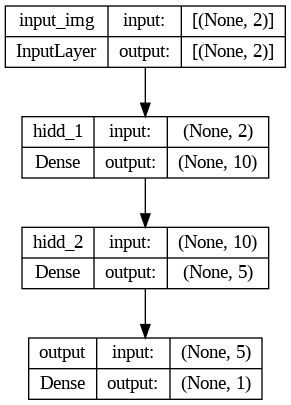

In [ ]:
#@title Establecer modelo

opt_tipo = "Adam" # param ["Gradiente Decreciente", "Adam", "Adadelta", "Adagrad", "Adamax", "Nadam", "FTRL"]
opt_learning_rate = 0.01 #@param {type: "number"}

# define la arquitectura de capas teniendo en cuenta la definición dada anteriomente
input_img_Lay = Input(shape=(num_inputs,), name='input_img') # capa de entrada
eachLay = input_img_Lay
auxName = 'hidd_'
auxId = 1
for val_hid in hidden_layers:

  if val_hid == "DropOut":
    eachLay = Dropout(0.2)(eachLay)
  elif val_hid == "BatchNormalization":
    auxlayerName = "bn"+str(auxId)
    auxId = auxId + 1
    eachLay = BatchNormalization(name=auxlayerName)(eachLay)
  elif val_hid.isnumeric():
    # agrega la capa oculta
    auxlayerName = auxName+str(auxId)
    auxId = auxId + 1
    eachLay = Dense(int(val_hid), name=auxlayerName)(eachLay) # capas ocultas

# agrega capa de salida
if tipo_output_softMax:
    # se genera una capa softmax
    output_img_Lay = Dense(units = len(CLASES), activation='softmax', name='output')(eachLay) # capa de salida
else:
    # se genera una capa lineal con una salida numérica
    output_img_Lay = Dense(1, activation=None, name='output')(eachLay) # capa de salida


if opt_tipo == "Gradiente Decreciente":
  opt = keras.optimizers.SGD(learning_rate=opt_learning_rate)
elif opt_tipo == "Adam":
  opt = keras.optimizers.Adam(learning_rate=opt_learning_rate)
elif opt_tipo == "Adadelta":
  opt = keras.optimizers.Adadelta(learning_rate=opt_learning_rate)
elif opt_tipo == "Adagrad":
  opt = keras.optimizers.Adagrad(learning_rate=opt_learning_rate)
elif opt_tipo == "Adamax":
  opt = keras.optimizers.Adamax(learning_rate=opt_learning_rate)
elif opt_tipo == "Nadam":
  opt = keras.optimizers.Nadam(learning_rate=opt_learning_rate)
elif opt_tipo == "FTRL":
  opt = keras.optimizers.Ftrl(learning_rate=opt_learning_rate)
else:
  opt = keras.optimizers.Adam()

# genera el modelo RNA MLP Backpropagation
model = Model(input_img_Lay, output_img_Lay, name='RNA')

# utiliza un loss de valor numérico
model.compile(optimizer=opt, loss='mse')

print("Modelo creado con ", len(model.layers), " capas:")
model.summary()
print("\n")
plot_model(model, show_layer_names=True, show_shapes=True)


4) Entrenar el modelo de la RNA:

In [ ]:
#@title Entrenar

activar_corte_por_estabilidad_error_val = False # param {type:"boolean"}

# separa al azar usando muestreo al azar del 10%
# para tomar algunos como datos de validación
x_t, x_v, y_t, y_v = train_test_split(x_train,
                                       (y_trainEnc if tipo_output_softMax else y_train),
                                       test_size=0.1)

print("\n> De los ", len(x_train), "ejemplos de entrenamiento: ")
print("            se usan ", len(x_t), "ejemplos para entrenar ")
print("            y ", len(x_v), "ejemplos para validar.")

print("\n\n>Comienza el Entrenamiento:")

if activar_corte_por_estabilidad_error_val:
  # se agrega un callBack para que corte
  # si el error de validación no sigue bajando
  # y devuelva los mejores pesos obtenidos
  early_stopping_monitor = keras.callbacks.EarlyStopping(
      monitor='val_loss',
      min_delta=0.01,
      patience=20,
      verbose=0,
      mode='min',
      baseline=None,
      restore_best_weights=True
  )
  callbacksEntr = [early_stopping_monitor]
else:
  early_stopping_monitor = None
  callbacksEntr = []

# lleva a cabo el entrenamiento
history = model.fit(x_t, y_t,
          epochs = cantEpocas,
          validation_data=(x_v, y_v,),
          callbacks=callbacksEntr )

print("\n>Entrenamiento Finalizado.")



> De los  74 ejemplos de entrenamiento: 
            se usan  66 ejemplos para entrenar 
            y  8 ejemplos para validar.


>Comienza el Entrenamiento:
Epoch 1/100
3/3 [==============================] - 1s 103ms/step - loss: 12351.0332 - val_loss: 7724.6973
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 12270.6484 - val_loss: 7695.6250
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 12200.4717 - val_loss: 7658.8789
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 12120.7969 - val_loss: 7621.6250
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 12021.9268 - val_loss: 7581.9258
Epoch 6/100
3/3 [==============================] - 0s 25ms/step - loss: 11911.6709 - val_loss: 7540.0454
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 11783.8955 - val_loss: 7492.0996
Epoch 8/100
3/3 [==============================] - 0s 30ms/step - loss: 11636.0518 - val_loss: 7431.2383

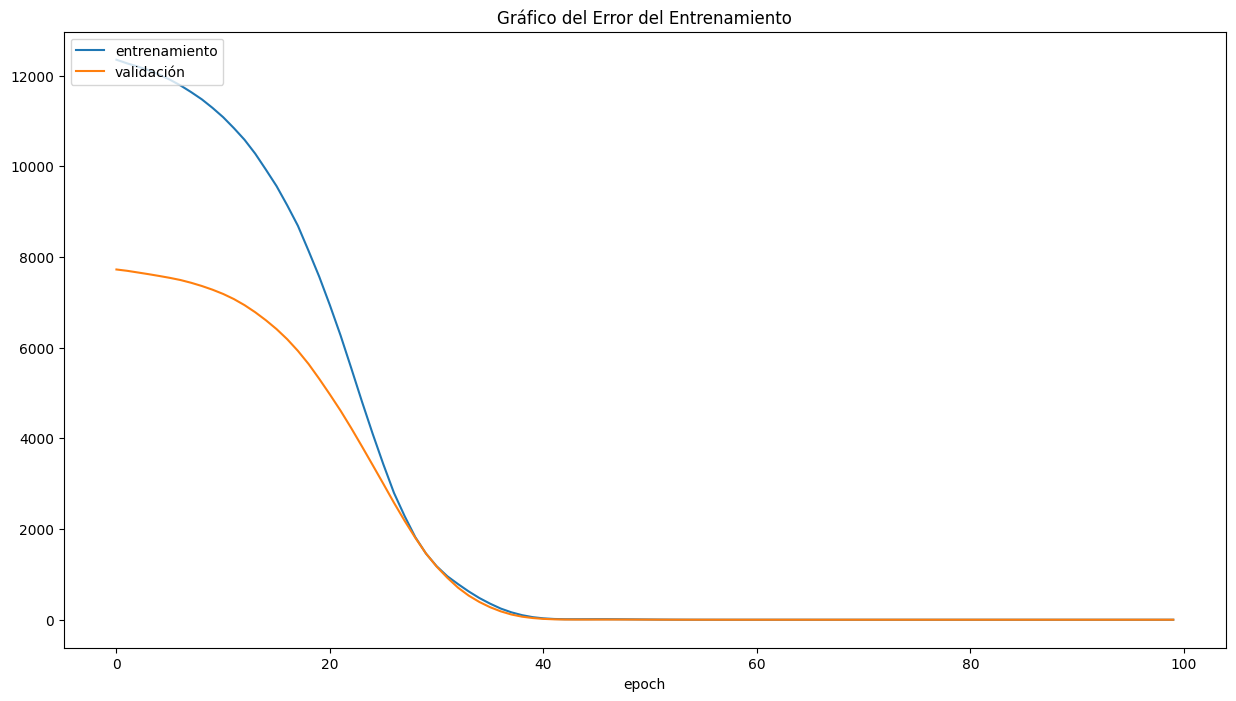

In [ ]:
#@title Mostrar Gráficos del Entrenamiento
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Gráfico del Error del Entrenamiento')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend(['entrenamiento', 'validación'], loc='upper left')
plt.show()


*** Resultados con datos de Entrenamiento: 
3/3 [==============================] - 0s 4ms/step


  Entrada 		 Real 			 Estimado 	    Error Absoluto 	   Error Relativo
 [71. 31.] 		   102.00 		   102.00 		     0.00 	     0.00%
 [40. 70.] 		   110.00 		   110.00 		     0.00 	     0.00%
 [57.  3.] 		    60.00 		    60.00 		     0.00 	     0.00%
 [58.  4.] 		    62.00 		    62.00 		     0.00 	     0.00%
 [67. 17.] 		    84.00 		    84.00 		     0.00 	     0.00%
 [74. 72.] 		   146.00 		   146.00 		     0.00 	     0.00%
 [22. 54.] 		    76.00 		    76.00 		     0.00 	     0.00%
 [26. 93.] 		   119.00 		   119.00 		     0.00 	     0.00%
 [ 5. 13.] 		    18.00 		    18.00 		     0.00 	     0.01%
 [29. 83.] 		   112.00 		   112.00 		     0.00 	     0.00%
 [98. 63.] 		   161.00 		   161.00 		     0.00 	     0.00%
 [64. 66.] 		   130.00 		   130.00 		     0.00 	     0.00%
 [22. 57.] 		    79.00 		    79.00 		     0.00 	     0.00%
 [44. 70.] 		   114.00 		   114.00 		     0.00 	     0.00%
 [89. 4

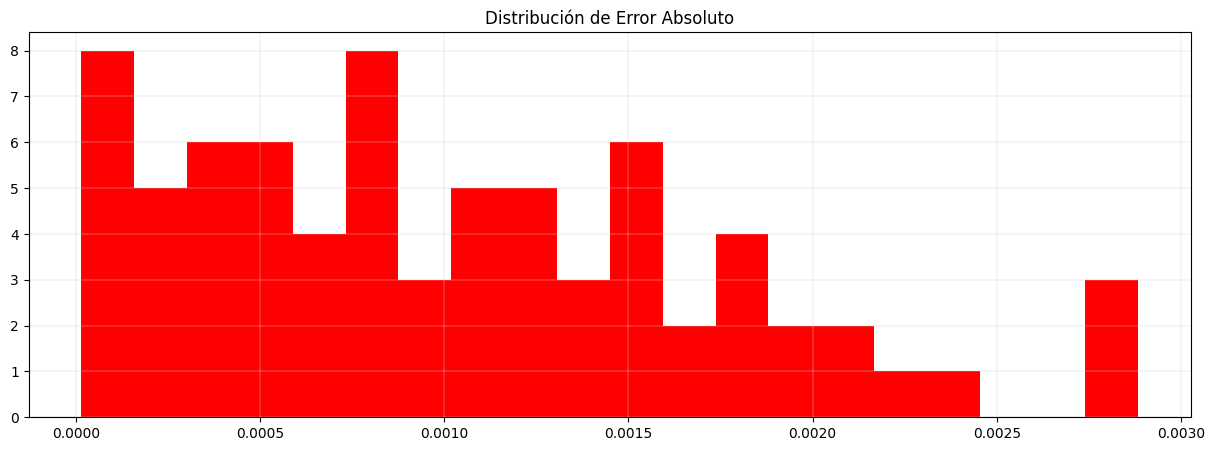


 Error Relativo: 
            Mínimo: 0.00% 
            Promedio: 0.00 ± 0.01
            Máximo: 0.10% 


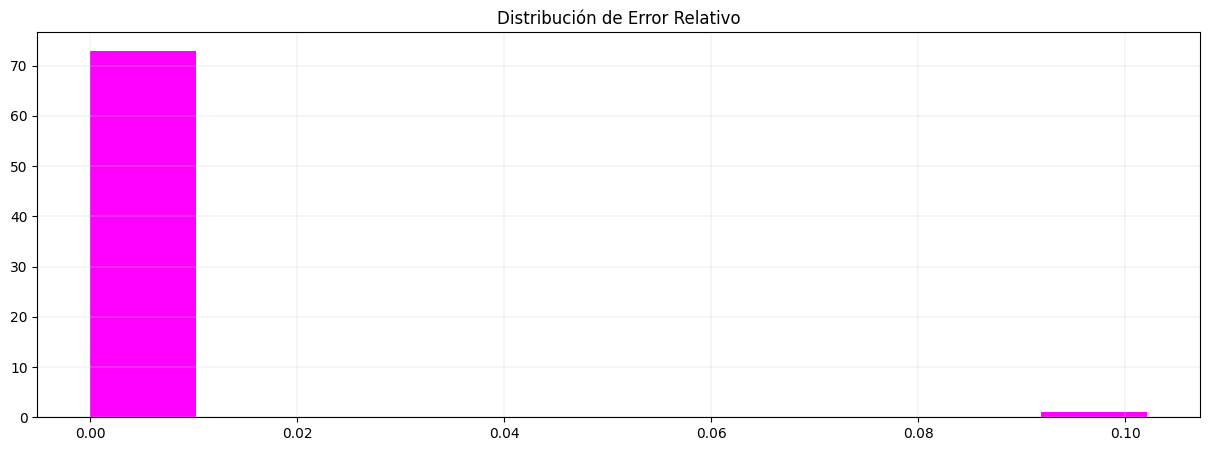

In [ ]:
#@title Probar red entrenada con datos de entrenamiento

mostrar_detalle_entrenamiento = True #@param {type:"boolean"}

# función auxiliar para el cálculo de error
def calcErrores(ent, pred, real, mostrarDetalle=False):
  arAbs = []
  arRel = []

  if mostrarDetalle:
    print("\n")
    print("  Entrada \t\t Real \t\t\t Estimado \t    Error Absoluto \t   Error Relativo")

  for x, pV, r in zip(ent, pred, real):
    # toma el valor estimado/predecido
    p = pV[0]
    # controla que sean números
    if not(math.isnan(r) or math.isnan(p)):
      # hace los cálculos
      eAbs = abs(r - p)
      if r != 0:
        eRel = (eAbs / r)*100.0
      else:
        eRel = (eAbs / 0.00001)*100.0
      arAbs.append(eAbs)
      arRel.append(eRel)

      if scaler is not None:
        x = scaler.inverse_transform([x])[0]

      if mostrarDetalle:
        print(" {} \t\t {:>8.2f} \t\t {:>8.2f} \t\t {:>8.2f} \t {:>8.2f}%".format(x, r, p, eAbs, eRel))

  return arAbs, arRel

def generarGrafico(ar, tit, b=10, c=None):
     # genera gráfico de los errores
    fig = plt.figure(figsize=(15,5))
 #   ax = fig.add_axes( [0, 0, 0.8, 0.8] )
 #   ax.boxplot( [arAbs, arRel] )
 #   ax.set_xticklabels( ["Error Absoluto", "Error Relativo"] )
#    plt.legend(["Error Absoluto", "Error Relativo"], loc='best')
    plt.hist( ar, bins=b, color=c )
    plt.grid(color='lightgrey', which='both', axis='both', linestyle='solid', linewidth=0.3)
    plt.title("Distribución de "+ tit)
    plt.show()


# función auxiliar para probar el modelo entrenado en detalle
def probarModelo(x, y, detalle=False):

    # procesa las imágenes de prueba con el modelo
    estimVals = model.predict(x)

    # llama a la función
    arAbs, arRel = calcErrores(x, estimVals, y, detalle)
    mostrarMetricas(arAbs, arRel)

def mostrarMetricas(arAbs, arRel):
    # muestra métricas
    print("\n")
    print("\n Error Absoluto: ")
    print("            Mínimo: {:.5f} ".format(np.min(arAbs)) )
    print("            Promedio: {:.5f} ± {:.5f}".format(np.mean(arAbs), np.std(arAbs)) )
    print("            Máximo: {:.5f} ".format(np.max(arAbs)) )
    generarGrafico(arAbs, "Error Absoluto", 20, "red")

    print("\n Error Relativo: ")
    print("            Mínimo: {:.2f}% ".format(np.min(arRel)) )
    print("            Promedio: {:.2f} ± {:.2f}".format(np.mean(arRel), np.std(arRel)) )
    print("            Máximo: {:.2f}% ".format(np.max(arRel)) )
    generarGrafico(arRel, "Error Relativo", 10, "magenta")


# prueba con los datos de entrenamiento
print("*** Resultados con datos de Entrenamiento: ")
probarModelo(x_train, y_train, mostrar_detalle_entrenamiento)


6) Evaluar el modelo de la RNA entrenado con los datos de prueba:



*** Resultados con datos de Prueba: 
1/1 [==============================] - 0s 32ms/step



 Error Absoluto: 
            Mínimo: 0.00003 
            Promedio: 0.00112 ± 0.00073
            Máximo: 0.00278 


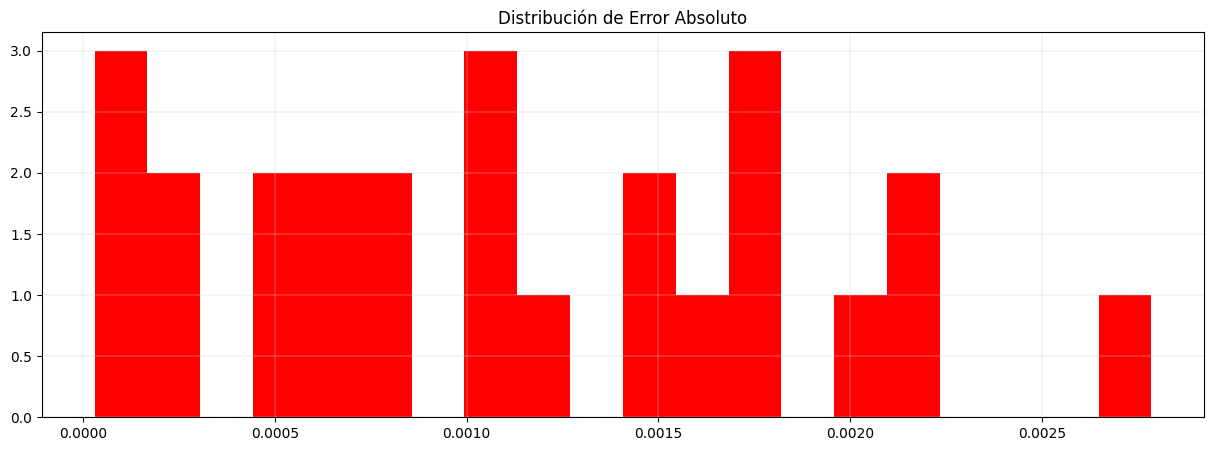


 Error Relativo: 
            Mínimo: 0.00% 
            Promedio: 0.00 ± 0.00
            Máximo: 0.02% 


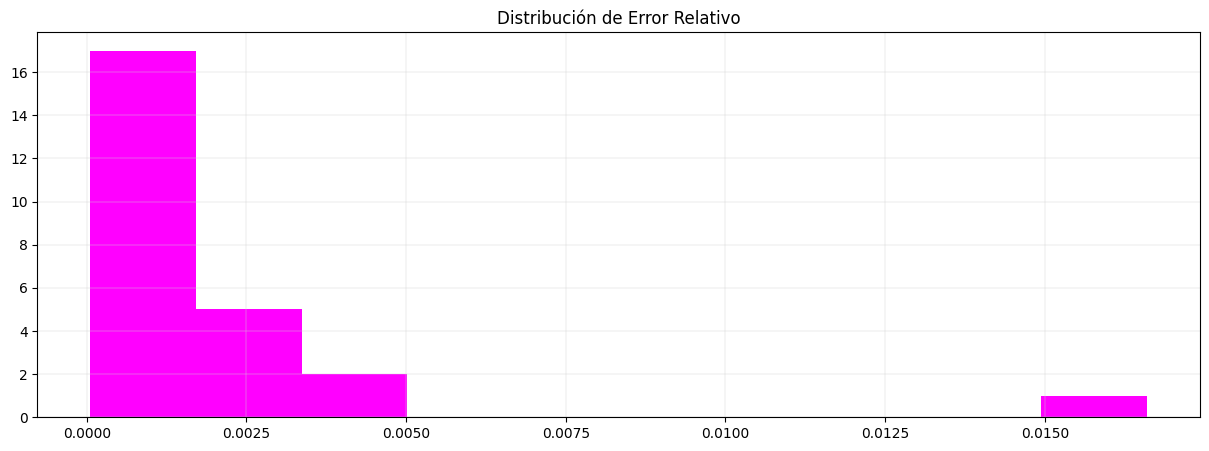

In [ ]:
 #@title Probar red entrenada con datos de prueba
 # evalua al modelo entrenado

 mostrar_detalle_prueba = True #@param {type:"boolean"}

# prueba con los datos de prueba
print("\n\n*** Resultados con datos de Prueba: ")
probarModelo(x_test, y_test, mostrar_detalle_prueba)

In [ ]:
#@title Probar con otros valores
import random

# @markdown > Prueba definida:
valor_entrada_1 =  9#@param {type:"number"}
valor_entrada_2 = 8 #@param {type:"number"}

# @markdown > Otras pruebas:
agregar_valores_azar = 10 #@param {type:"number"}


nX = [  [valor_entrada_1,  valor_entrada_2], [valor_entrada_2,  valor_entrada_1]  ]
if agregar_valores_azar > 0:
  for i in range(agregar_valores_azar):
    nX.append( [random.randint(0,100), random.randint(0,100)] )

if aplica_normalizacion:
  # normaliza valores de entrada (si corresponde)
  # usando mismo criterio aplicado en los datos de entrenamiento
  nXX = scaler.transform(nX)
else:
  # sino usa el valor de entrada directo
  nXX = nX

# ejecuta modelo
resY = model.predict(nXX)

# muestra resultados

for i in range(len(nX)):
  if i == 0:
    print("\n*** Resultados con datos indicados: ")
  elif i == 2:
    print("\n*** Resultados con otros datos: ")

  en = nX[i]
  val = resY[i][0]
  print(en, " -> ", int(round(val,0)))


1/1 [==============================] - 0s 37ms/step

*** Resultados con datos indicados: 
[9, 8]  ->  17
[8, 9]  ->  17

*** Resultados con otros datos: 
[31, 72]  ->  103
[11, 27]  ->  38
[21, 54]  ->  75
[34, 77]  ->  111
[24, 28]  ->  52
[55, 49]  ->  104
[75, 82]  ->  157
[58, 0]  ->  58
[42, 77]  ->  119
[22, 66]  ->  88
